# Dynamic Pricing ML Project

In [57]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Set plotting style
sns.set(style='whitegrid')


In [36]:
# Load the dataset
df = pd.read_csv(r'C:\Users\micha\OneDrive\Desktop\Dynamic_Pricing_Strategy_Using_ML\Dynamic_Pricing_Strategy_Using_ML\dataset\dynamic_pricing.csv')

In [37]:
# Preview the dataset
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [38]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB


In [39]:
# Check for missing values
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [40]:
# Summary statistics of numerical features
df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


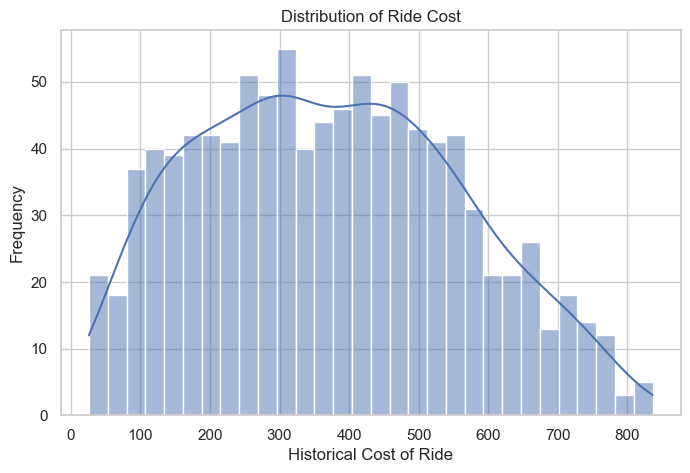

In [ ]:
# Visualize the target variable distribution (Historical_Cost_of_Ride)
plt.figure(figsize=(8, 5))
sns.histplot(df['Historical_Cost_of_Ride'], kde=True, bins=30)
plt.title('Distribution of Ride Cost')
plt.xlabel('Historical Cost of Ride')
plt.ylabel('Frequency')
plt.show()

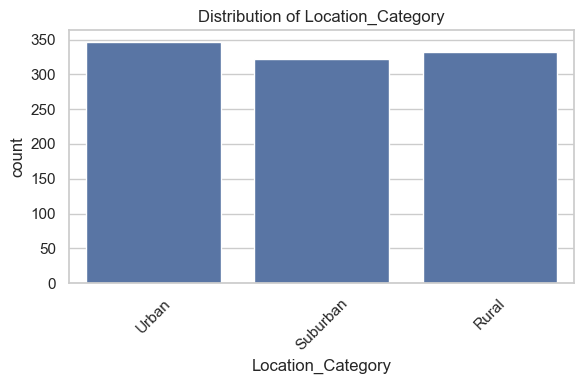

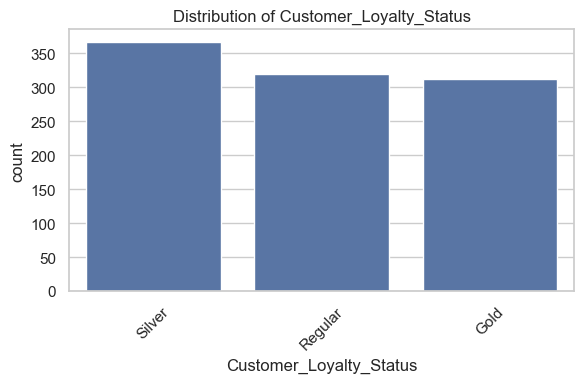

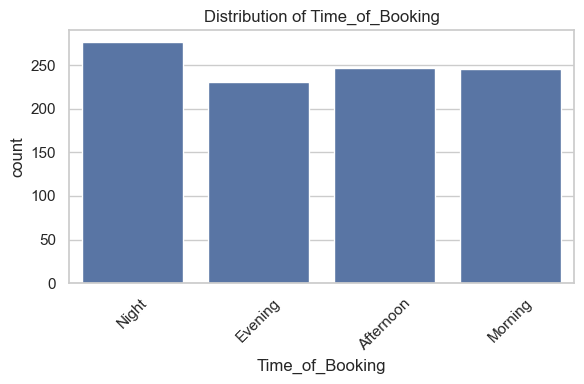

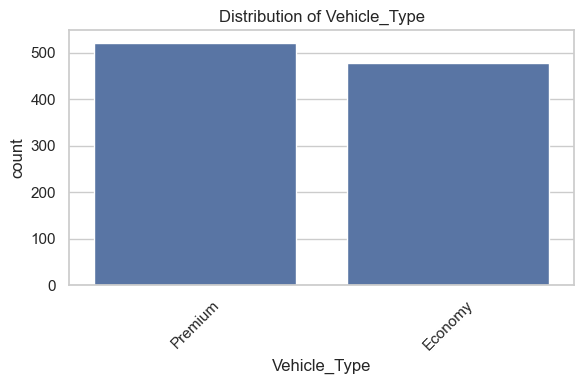

In [41]:
# Visualize key categorical variables
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

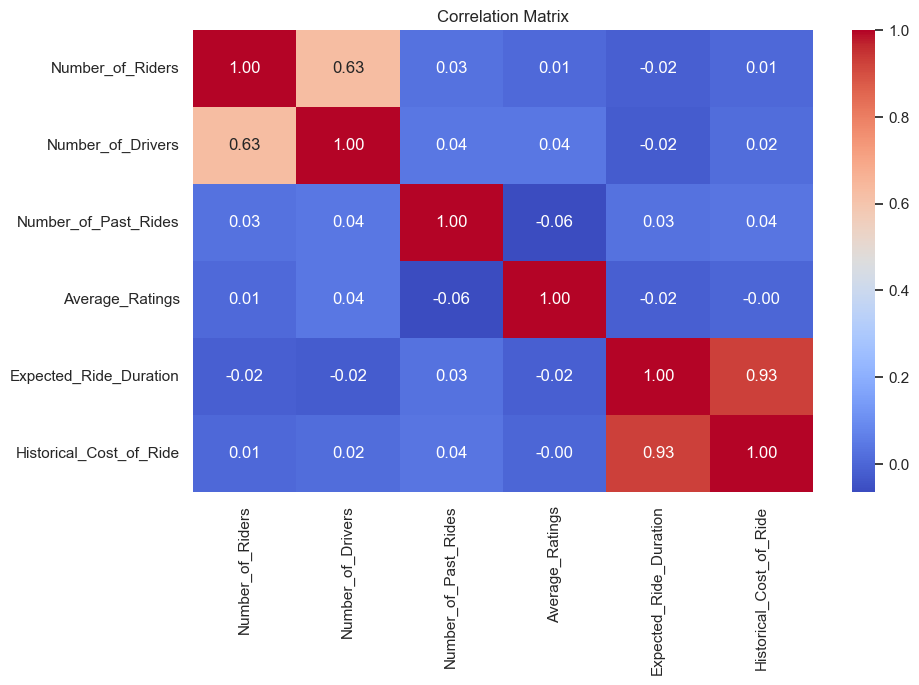

In [ ]:
# Correlation heatmap for numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Preprocessing & Feature Engineering

In [42]:
# Select features and define target
target = 'Historical_Cost_of_Ride'
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numeric_cols = X.select_dtypes(include='number').columns.tolist()

print('Categorical Columns:', categorical_cols)
print('Numeric Columns:', numeric_cols)


Categorical Columns: ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
Numeric Columns: ['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides', 'Average_Ratings', 'Expected_Ride_Duration']


In [43]:
# Set up one-hot encoding for categorical features
# We'll use a ColumnTransformer to handle different data types
preprocessor = ColumnTransformer(
    transformers=[ ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)],
    remainder='passthrough'  # Keep numerical features as-is
)

In [44]:
# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on training data and transform both sets
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print('Transformed training shape:', X_train_processed.shape)
print('Transformed testing shape:', X_test_processed.shape)


Transformed training shape: (800, 13)
Transformed testing shape: (200, 13)


In [45]:
# create the directory to save data for modeling
import os
os.makedirs('../models', exist_ok=True)

# Save the preprocessor and training data for modeling
joblib.dump(preprocessor, '../models/preprocessor.joblib')
joblib.dump((X_train_processed, X_test_processed, y_train, y_test), '../models/processed_data.joblib')

print('Preprocessing complete and files saved.')


Preprocessing complete and files saved.


### Model Training & Evaluation

In [ ]:
# Load preprocessed data and target
preprocessor = joblib.load(r'C:\Users\micha\OneDrive\Desktop\Dynamic_Pricing_Strategy_Using_ML\Dynamic_Pricing_Strategy_Using_ML\models\preprocessor.joblib')
X_train, X_test, y_train, y_test = joblib.load(r'C:\Users\micha\OneDrive\Desktop\Dynamic_Pricing_Strategy_Using_ML\Dynamic_Pricing_Strategy_Using_ML\models\processed_data.joblib')

print(f'Training set shape: {X_train.shape}, Test set shape: {X_test.shape}')


Training set shape: (800, 13), Test set shape: (200, 13)


In [51]:
# Train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}')


Random Forest - MAE: 55.04, RMSE: 73.35


In [52]:
#  Train XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

#  Evaluate XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'XGBoost - MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}')


XGBoost - MAE: 57.58, RMSE: 77.32


In [54]:
# Select the best model based on RMSE
best_model = rf if rmse_rf < rmse_xgb else xgb
best_name = "XGBoost" if best_model == rf else "Random Forest"

# Save best model
import os
os.makedirs('../models', exist_ok=True)
joblib.dump(best_model, '../models/best_model.joblib')

print(f'Saved best model: {best_name}')


Saved best model: XGBoost


### SHAP Explainability & Business Insights

In [58]:
!pip install shap
import shap
import matplotlib.pyplot as plt
import os

# SHAP settings
shap.initjs()
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [59]:
# Load the best model and preprocessed data
model = joblib.load('../models/best_model.joblib')
preprocessor = joblib.load('../models/preprocessor.joblib')
X_train, X_test, y_train, y_test = joblib.load('../models/processed_data.joblib')


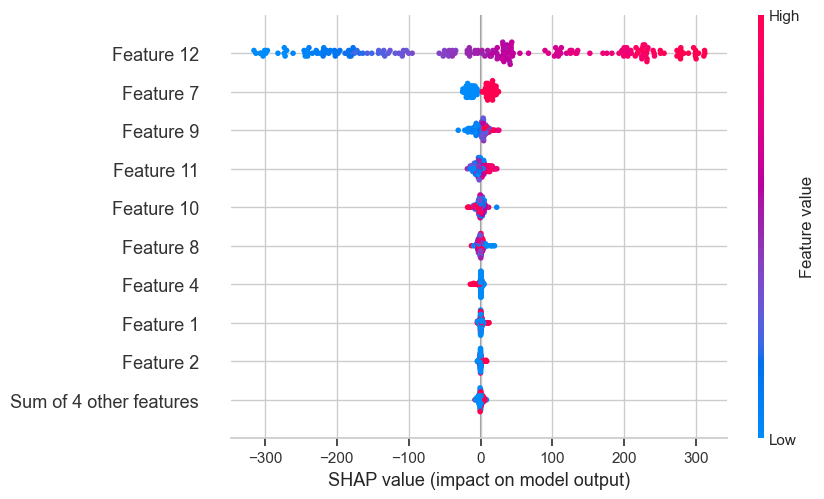

In [60]:
# Create SHAP explainer and compute SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# SHAP Beeswarm summary plot
plt.figure()
shap.plots.beeswarm(shap_values, show=False)
os.makedirs('../reports', exist_ok=True)
plt.savefig('../reports/shap_beeswarm.png', bbox_inches='tight')
plt.show()


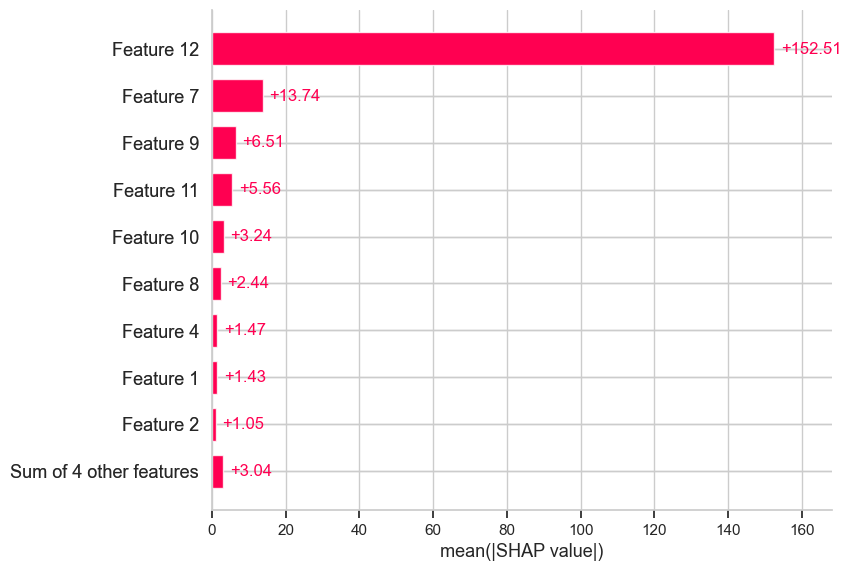

In [61]:
# 📊 SHAP bar plot (mean absolute SHAP values)
plt.figure()
shap.plots.bar(shap_values, show=False)
plt.savefig('../reports/shap_bar.png', bbox_inches='tight')
plt.show()
